In [1]:
from utils import *
from UNet import UNetSmol
from ddpm import DDPM
import torch.optim as optim

import matplotlib.pyplot as plt

In [2]:
train_loader, val_loader = get_mnist(batch_size=32)

In [3]:
unet = UNetSmol(1, 1)
optimizer = optim.AdamW(unet.parameters(), lr=1e-3)

In [4]:
scheduler = DDPM(
    model = unet,
    optimizer = optimizer,
    T = 200,
    start = 1e-4,
    end = 3e-2,
)

In [5]:
losses = scheduler.train(train_loader, epochs=1)

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Training:   3%|▎         | 63/1875 [00:12<05:11,  5.81it/s]

In [16]:
x_ts = scheduler.sample(5, 10)

In [17]:
example = x_ts[-1]
example.shape

torch.Size([10, 1, 28, 28])

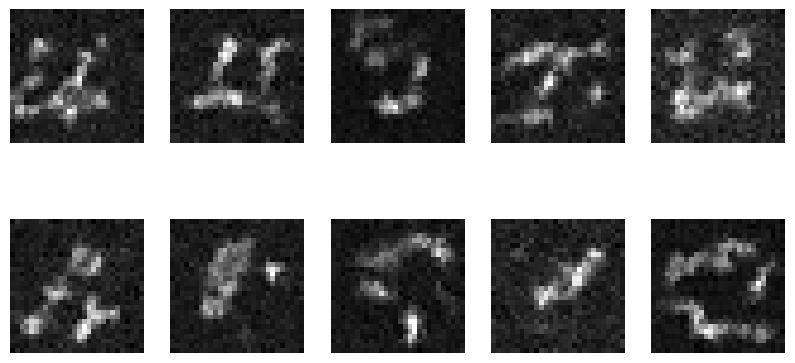

In [18]:


plt.figure(figsize=(10, 5))
for i in range(10):
    img = example[i].detach().numpy().squeeze()
    ax = plt.subplot(2, 5, i + 1)
    ax.axis('off')
    plt.imshow(img, cmap='gray')